# Exercise 7 David Foss

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Task 1

#### a)

In [2]:
def rk4(f, x0, y0, xn, n):
    h = (xn-x0)/n
    x=np.linspace(x0, xn, n+1) 
    y=np.zeros(n+1)
    y[0]=y0
    for i in range(0, n):
        k1 = f(x[i], y[i])
        k2 = f((x[i]+h/2), (y[i]+h*k1/2)) 
        k3 = f((x[i]+h/2), (y[i]+h*k2/2)) 
        k4 = f((x[i]+h), (y[i]+h*k3))
        y[i+1] = y[i] + (h/6)*(k1 + 2*k2 + 2*k3 + k4) 
    return x,y

#### b)

In [6]:
def f_xy(x, y): return -2*x*y
def y_anal(x): return np.exp(-x**2) 
x0 = 0
y0 = 1

ms = np.array([2, 4, 8 ,16, 32, 64, 128, 256, 512, 1024])
error = np.zeros(len(ms))
k=0
for m in ms:
    x, y_ca = rk4(f_xy, x0, y0, 1, m) 
    exact = y_anal(x)
    error[k] = np.abs(exact - y_ca).max() 
    k+=1
p = [ np.log2(error[i+1]/error[i]) / (np.log2(ms[i]/ms[i+1])) for i in range(len(ms)-1) ]

print('Konvergensorden: ', p)   

Konvergensorden:  [1.4928832212424585, 3.809419903569761, 3.9729480929428203, 3.998376269722359, 4.0017273472666846, 4.00144843438954, 4.000964186616443, 3.999558548494524]


### Task 3

#### c)

In [7]:
def euler(f, x0, y0, xn, n): 
    h = (xn-x0)/n
    x=np.linspace(x0, xn, n+1)
    y=np.zeros((n+1, 4))
    y[0,:]=y0
    for i in range(0, n):
        y[i+1,:] = y[i,:] + h*f(x[i],y[i,:])
    return x,y

In [9]:

def heun(f, x0, y0, xn, n): 
    h = (xn-x0)/n
    x=np.linspace(x0, xn, n+1) 
    y=np.zeros((n+1, 4)) 
    y[0,:]=y0
    for i in range(0, n):
        k1 = f(x[i], y[i,:])
        k2 = f(x[i] + h, y[i,:] + h*k1) 
        y[i+1,:] = y[i,:] + (h/2) * (k1 + k2)
    return x,y

In [10]:
a, b, c, d = 0, 1, 0, 1
k1, k2, m1, m2 = 100, 200, 10, 5
x0, xn = 0, 3  # Intervallet
n1, n2, n3 = 30, 300, 3000  # Steglengde 0.1, 0.01 og 0.001
y0 = np.array([a, c, b, d])  # Fra 3a, initialbetingelser


def f(x, y): return np.array([y[2], y[3], (1/m1)*(-k1*y[0]+k2*(y[1]-y[0])), (-k2/m2)*(y[1]-y[0])])
                                                                             
# h = 0.1
ne30, e30=euler(f, x0, y0, xn, n1) 
nh30, h30=heun(f, x0, y0, xn, n1)

# h = 0.01
ne300, e300=euler(f, x0, y0, xn, n2) 
nh300, h300=heun(f, x0, y0, xn, n2)

# h = 0.001
ne3000, e3000=euler(f, x0, y0, xn, n3) 
nh3000, h3000=heun(f, x0, y0, xn, n3)


<function matplotlib.pyplot.show(close=None, block=None)>

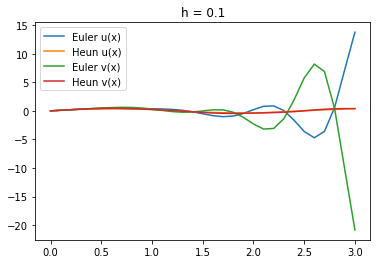

In [11]:
plt.plot(ne30, e30[:, 0], label='Euler u(x)') 
plt.plot(nh30, h30[:, 0], label='Heun u(x)') 
plt.plot(ne30, e30[:, 1], label='Euler v(x)') 
plt.plot(nh30, h30[:, 1], label='Heun v(x)') 
plt.legend()
plt.title('h = 0.1')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

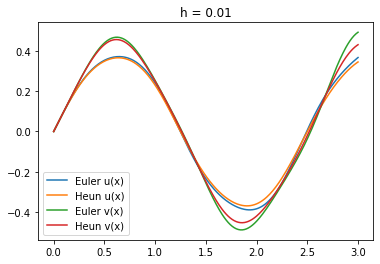

In [12]:
plt.plot(ne300, e300[:, 0], label='Euler u(x)') 
plt.plot(nh300, h300[:, 0], label='Heun u(x)') 
plt.plot(ne300, e300[:, 1], label='Euler v(x)') 
plt.plot(nh300, h300[:, 1], label='Heun v(x)') 
plt.legend()
plt.title('h = 0.01')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

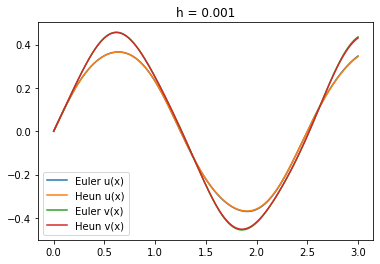

In [13]:
plt.plot(ne3000, e3000[:, 0], label='Euler u(x)') 
plt.plot(nh3000, h3000[:, 0], label='Heun u(x)') 
plt.plot(ne3000, e3000[:, 1], label='Euler v(x)') 
plt.plot(nh3000, h3000[:, 1], label='Heun v(x)') 
plt.legend()
plt.title('h = 0.001')
plt.show


In [16]:
E = lambda u,v,du,dv : (m1*du**2)/2 + (m2*dv**2)/2 + (k1*u**2)/2 + (k2*(u-v)**2)/2

<function matplotlib.pyplot.show(close=None, block=None)>

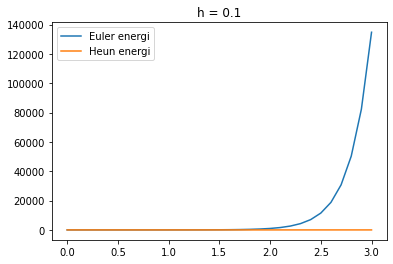

In [17]:
plt.plot(ne30, E(e30[:, 0], e30[:, 1], e30[:, 2], e30[:, 3]), label='Euler energi') 
plt.plot(nh30,E(h30[:,0], h30[:,1], h30[:,2], h30[:,3]),label= 'Heun energi') 
plt.legend()
plt.title('h = 0.1')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

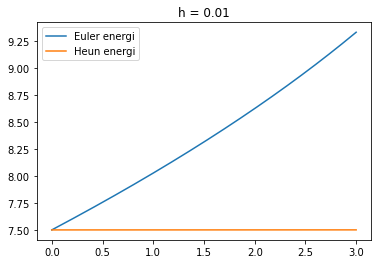

In [18]:
plt.plot(ne300, E(e300[:, 0], e300[:, 1], e300[:, 2], e300[:, 3]), label='Euler energi') 
plt.plot(nh300,E(h300[:,0], h300[:,1], h300[:,2], h300[:,3]),label= 'Heun energi')
plt.legend()
plt.title('h = 0.01')
plt.show


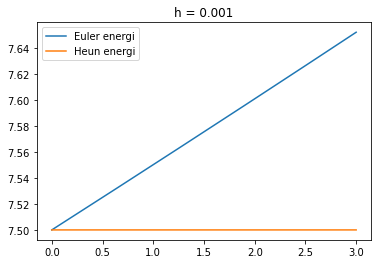

In [19]:
plt.plot(ne3000, E(e3000[:, 0], e3000[:, 1], e3000[:, 2], e3000[:, 3]), label='Euler energi') 
plt.plot(nh3000,E(h3000[:,0], h3000[:,1], h3000[:,2], h3000[:,3]),label= 'Heun energi') 
plt.legend()
plt.title('h = 0.001')
plt.show()
